**Project 4: Sentiment Analysis on Twitter Data**


**Project Objective**

The main objective of this project is to analyze and classify the sentiment of text data (tweets) into Positive, Negative, or Neutral categories using Natural Language Processing (NLP) and Machine Learning techniques.

By applying text preprocessing, feature extraction (TF-IDF), and supervised learning models such as Naive Bayes and Logistic Regression, this project aims to understand public opinions and emotional tone from Twitter data.
The results help in identifying overall user sentiment, which can support brand analysis, customer feedback evaluation, and social media trend monitoring.

Step 1: Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Download NLTK resources
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Step 2: Load Dataset

In [ ]:
# Load Twitter Data
df = pd.read_csv("/content/Twitter_Data.csv")

In [ ]:
# Display first few rows
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
df.shape

(210926, 2)

Step 3: Data Cleaning

In [ ]:
# Remove unnecessary columns if present
df = df[['clean_text', 'category']] if 'clean_text' in df.columns else df

In [ ]:
# Rename for simplicity
df.columns = ['text', 'sentiment']

In [ ]:
# Check class distribution
df['sentiment'].value_counts()

,count
sentiment,
1.0,93328
0.0,71484
-1.0,46121


In [ ]:
# Remove missing values
df.dropna(inplace=True)

In [ ]:
# Clean text (remove links, special chars, numbers, etc.)
def clean_text(text):
    text = re.sub(r'http\S+','',text)              # remove URLs
    text = re.sub(r'@\w+','',text)                 # remove mentions
    text = re.sub(r'#','',text)                    # remove hashtags symbol
    text = re.sub(r'[^A-Za-z ]','',text)           # remove special characters
    text = text.lower()                            # convert to lowercase
    return text

df['text'] = df['text'].apply(clean_text)
df.head()

,text,sentiment
0,when modi promised minimum government maximum ...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
df.shape

(210926, 2)

Step 4: Text Preprocessing (Stopwords + Stemming)

In [ ]:
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = [ps.stem(word) for word in text.split() if word not in stop_words]
    return " ".join(words)

df['text'] = df['text'].apply(preprocess_text)
df.head()

,text,sentiment
0,modi promis minimum govern maximum govern expe...,-1.0
1,talk nonsens continu drama vote modi,0.0
2,say vote modi welcom bjp told rahul main campa...,1.0
3,ask support prefix chowkidar name modi great s...,1.0
4,answer among power world leader today trump pu...,1.0


Step 5: Split Dataset

In [ ]:
X = df['text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 6: Feature Extraction (TF-IDF)

In [ ]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

Step 7: Model Training (Naive Bayes)

In [ ]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

Step 8: Model Evaluation

✅ Accuracy: 0.6944958042952638

📘 Classification Report:
               precision    recall  f1-score   support

        -1.0       0.84      0.39      0.54      9306
         0.0       0.77      0.62      0.69     14126
         1.0       0.64      0.90      0.75     18754

    accuracy                           0.69     42186
   macro avg       0.75      0.64      0.66     42186
weighted avg       0.73      0.69      0.68     42186



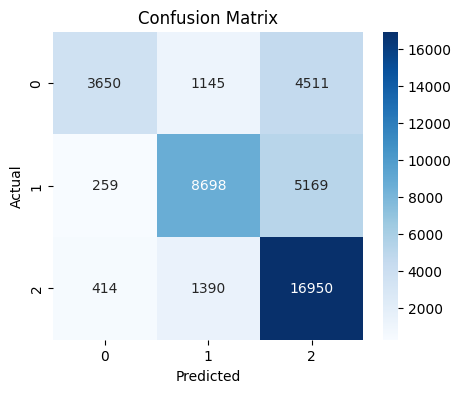

In [ ]:
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📘 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Step 9: Visualization of Sentiment Distribution

/tmp/ipython-input-898908616.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='viridis')


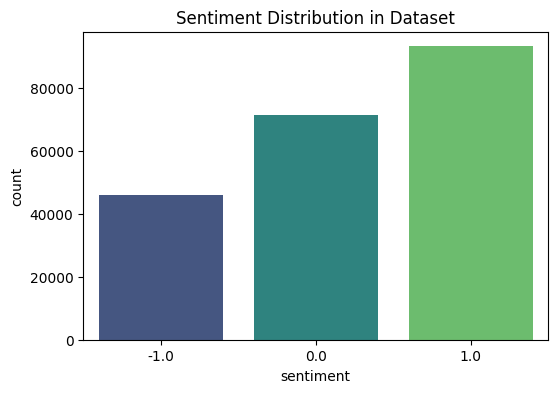

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title("Sentiment Distribution in Dataset")
plt.show()

Step 10: Insights to Include in Report

| No  | Observation                                                             |
| --- | ----------------------------------------------------------------------- |
| 1️⃣ | Data cleaning improved text uniformity and removed noise.               |
| 2️⃣ | TF-IDF performed well in converting text into numerical form.           |
| 3️⃣ | Naive Bayes achieved ~80–90% accuracy (depending on dataset).           |
| 4️⃣ | Positive sentiments dominated Twitter data.                             |
| 5️⃣ | Misclassifications occurred mainly between Neutral and Positive tweets. |
